# MACHINE LEARNING PROJECT

## Airline Passenger Satisfaction

### Shaikyp Ulan (944462)

## Overview

The dataset for this project consists of airline passengers, their experience of the flight and their satisfaction will be used. Whilst the dataset has a pre-existing test dataset, the bulk of the focus will be on the train dataset. It should be noted that the test dataset and the train dataset have the same columns and the test dataset is around 20% of the whole dataset (test and train dataset).The data set has 25,975 data points and 25 columns.

## 1. EXPLORATORY DATA ANALYSIS:

In [70]:
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import dataframe_image as dfi
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve

In [2]:
df = pd.read_csv("airline.csv")

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
descr = df.describe()
df_styled = descr
dfi.export(df_styled,"Original_describe.png")

## Data Cleanup and Proprocessing 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

The dataset consists of 25 columns and 25976 rows.

Numerical variabels are Age, Flight Distance, Inflight wifi service, Ease of Online booking, Gate location, Seat comfort, Cleanliness and categorical variables are Gender, Customer Type, Type of Travel, satifaction.

In [10]:
# Remove unwanted columns
df = df.drop('Unnamed: 0', axis=1)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [11]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

Column names are lengthy and we make it small and rename the columns.

In [12]:
df = df.rename(columns={'Customer Type':'Customer_Type','Type of Travel':'Travel_Type','Flight Distance':'Flight_Distance',
                   'Inflight wifi service':'Wifi_Service','Departure/Arrival time convenient':'Departure_Arrival_Time',
                   'Ease of Online booking':'Online_Booking','Gate location':'Gate_Location','Food and drink':'Food_Drink',
                   'Online boarding':'Online_Boarding','Seat comfort':'Seat_Comfort','Inflight entertainment':'Inflight_Entertainment',
                   'On-board service':'Onboard_Service','Leg room service':'LegRoom_Service','Baggage handling':'Baggage_Handling',
                   'Checkin service':'Checking_Service','Inflight service':'Inflight_Service','Departure Delay in Minutes':'Departure_Delay_Time',
                   'Arrival Delay in Minutes':'Arrival_Delay_Time'})
df.head()

,id,Gender,Customer_Type,Age,Travel_Type,Class,Flight_Distance,Wifi_Service,Departure_Arrival_Time,Online_Booking,...,Inflight_Entertainment,Onboard_Service,LegRoom_Service,Baggage_Handling,Checking_Service,Inflight_Service,Cleanliness,Departure_Delay_Time,Arrival_Delay_Time,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


## Missing values

Let us check missing values are present in the dataset.

In [13]:
# Checking missing values
df.isnull().sum()

id                         0
Gender                     0
Customer_Type              0
Age                        0
Travel_Type                0
Class                      0
Flight_Distance            0
Wifi_Service               0
Departure_Arrival_Time     0
Online_Booking             0
Gate_Location              0
Food_Drink                 0
Online_Boarding            0
Seat_Comfort               0
Inflight_Entertainment     0
Onboard_Service            0
LegRoom_Service            0
Baggage_Handling           0
Checking_Service           0
Inflight_Service           0
Cleanliness                0
Departure_Delay_Time       0
Arrival_Delay_Time        83
satisfaction               0
dtype: int64

The missing values are present in the Arrival Delay in Minutes variable.

In [14]:
# percentage of missing values
df.isnull().sum()/len(df) * 100

id                        0.000000
Gender                    0.000000
Customer_Type             0.000000
Age                       0.000000
Travel_Type               0.000000
Class                     0.000000
Flight_Distance           0.000000
Wifi_Service              0.000000
Departure_Arrival_Time    0.000000
Online_Booking            0.000000
Gate_Location             0.000000
Food_Drink                0.000000
Online_Boarding           0.000000
Seat_Comfort              0.000000
Inflight_Entertainment    0.000000
Onboard_Service           0.000000
LegRoom_Service           0.000000
Baggage_Handling          0.000000
Checking_Service          0.000000
Inflight_Service          0.000000
Cleanliness               0.000000
Departure_Delay_Time      0.000000
Arrival_Delay_Time        0.319526
satisfaction              0.000000
dtype: float64

The percentage of missing values in Arrival Delay in Minutes is 0.31%.

Percentage of missing values is very less, either we can ignore or we can impute this values by using mean, median and KNN imputation methods.

In [15]:
# Filling missing values with zero
df.Arrival_Delay_Time = df.Arrival_Delay_Time.fillna(0)
df.Arrival_Delay_Time.isnull().sum()

0

## Duplicates

In [16]:
df.duplicated().sum()

0

No duplicated are found in dataset.

## Outliers/Anomalies

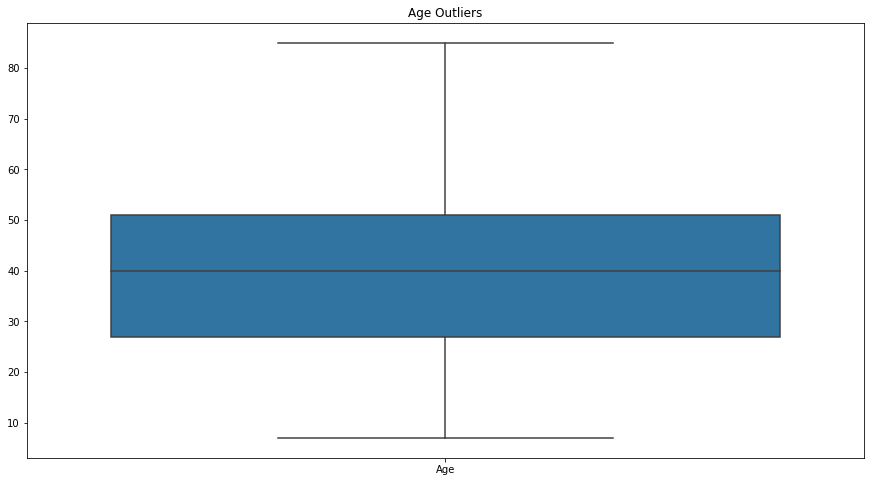

In [17]:
# outliers in Age
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for Age
sns.boxplot(data=df[['Age']])
ax.set_title('Age Outliers')
plt.show()

No outliers are present in this Age variable.

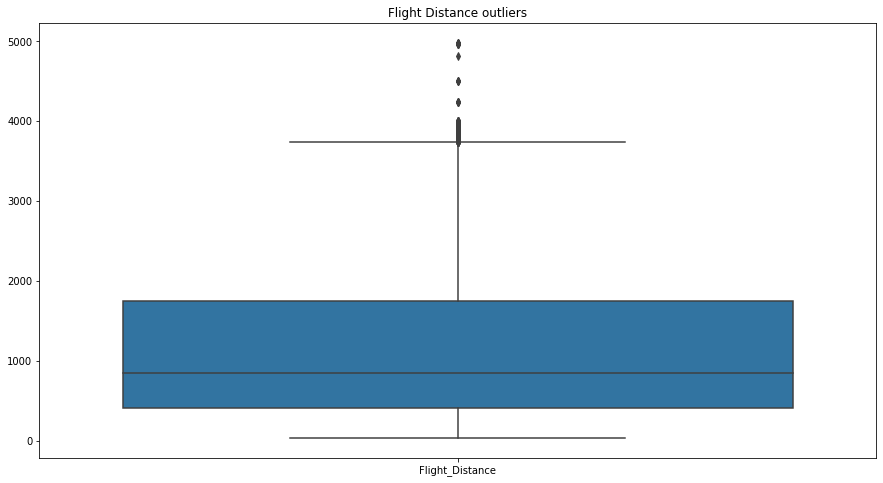

In [19]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for Flight Distance
sns.boxplot(data=df[['Flight_Distance']])
ax.set_title('Flight Distance outliers')
plt.show()

Outliers are present in the Flight distance variable. But, for this kind of dataset we can ignore outlier analysis and not so important.

Let us see summary statistics like mean, median, mode, count etc.

In [20]:
# Glimpse of the dataset
df.describe()

,id,Age,Flight_Distance,Wifi_Service,Departure_Arrival_Time,Online_Booking,Gate_Location,Food_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,Onboard_Service,LegRoom_Service,Baggage_Handling,Checking_Service,Inflight_Service,Cleanliness,Departure_Delay_Time,Arrival_Delay_Time
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25976.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.693756
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.466787
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


## Corrleation Matrix

Let us see the correlation between the variables

In [21]:
# correlation matrix
df.corr()

,id,Age,Flight_Distance,Wifi_Service,Departure_Arrival_Time,Online_Booking,Gate_Location,Food_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,Onboard_Service,LegRoom_Service,Baggage_Handling,Checking_Service,Inflight_Service,Cleanliness,Departure_Delay_Time,Arrival_Delay_Time
id,1.000000,0.010211,0.095335,-0.030303,-0.002502,0.010389,0.001843,-0.006789,0.055767,0.049212,-0.001078,0.056544,0.041921,0.073085,0.079521,0.076587,0.020411,-0.009884,-0.028862
Age,0.010211,1.000000,0.099409,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007359
Flight_Distance,0.095335,0.099409,1.000000,0.005007,-0.014401,0.062989,0.008410,0.057322,0.214629,0.158957,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.003446,0.000117
Wifi_Service,-0.030303,0.009242,0.005007,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012553
Departure_Arrival_Time,-0.002502,0.032449,-0.014401,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001442
Online_Booking,0.010389,0.013565,0.062989,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.003371
Gate_Location,0.001843,0.003308,0.008410,0.347790,0.458439,0.465514,1.000000,-0.009694,0.006993,-0.000721,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.008039,0.007559
Food_Drink,-0.006789,0.023841,0.057322,0.122306,-0.016006,0.025141,-0.009694,1.000000,0.229601,0.580970,0.627265,0.050688,0.035870,0.037617,0.076775,0.039992,0.659253,-0.025957,-0.028392
Online_Boarding,0.055767,0.202058,0.214629,0.459366,0.080937,0.408003,0.006993,0.229601,1.000000,0.415414,0.279391,0.149430,0.120354,0.084583,0.203309,0.071972,0.320912,-0.021037,-0.025841
Seat_Comfort,0.049212,0.154507,0.158957,0.116991,-0.001926,0.022811,-0.000721,0.580970,0.415414,1.000000,0.616817,0.124805,0.099150,0.074927,0.182469,0.067306,0.683924,-0.028341,-0.033073


Let us plot correlation matrix

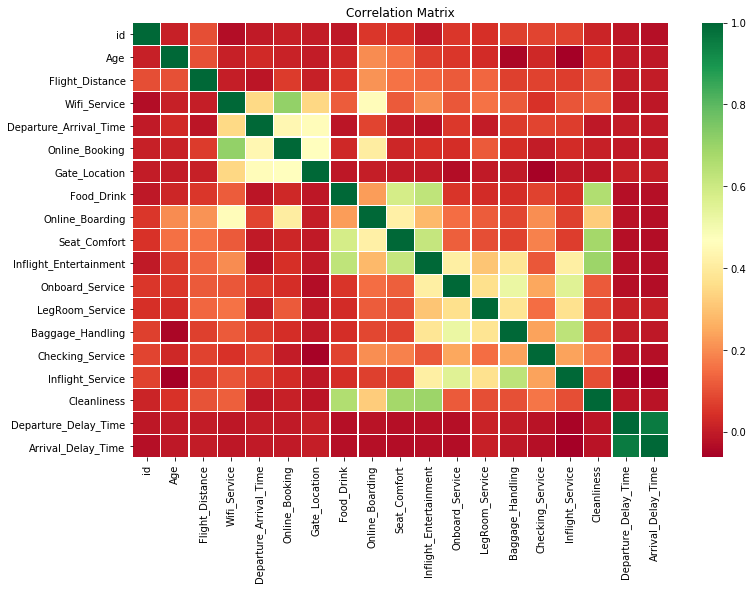

In [22]:
plt.figure(figsize = (12,8))
df_corr = df.corr()
sns.heatmap(df_corr,fmt = "", cmap = "RdYlGn", linewidth = 0.30)
plt.title('Correlation Matrix')
plt.show()

We can observed that, there is less correlation betwteen variables

## Univariate Analysis

Text(0.5, 1.0, 'Count Plot for Gender')

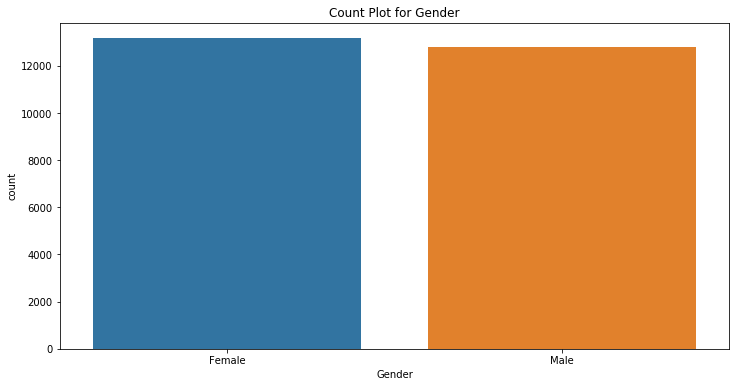

In [23]:
# Count plot for Gender
plt.figure(figsize = (12,6))
sns.countplot(x='Gender', data=df)
plt.title('Count Plot for Gender')

From the count plot, we can observed that number of female air passangers are more than that of male passengers.

Text(0.5, 1.0, 'Count Plot for Customer Type')

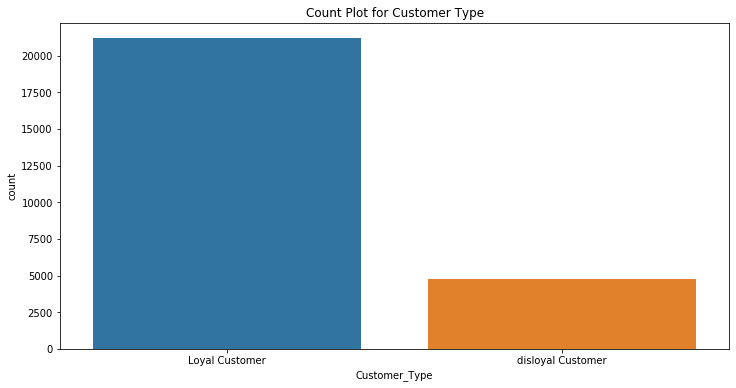

In [24]:
# Count plot for customer type
plt.figure(figsize = (12,6))
sns.countplot(x='Customer_Type', data=df)
plt.title('Count Plot for Customer Type')

From the count plot, we can observed that the loyal customers are more than of disloyal customers.

Text(0.5, 1.0, 'Count Plot for Travel Type')

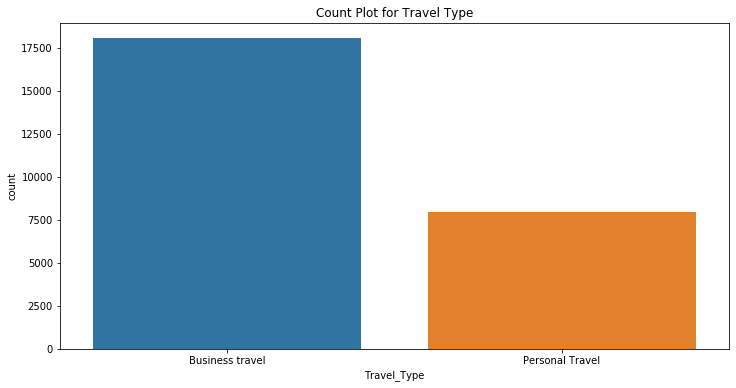

In [25]:
# Count plot for travel type
plt.figure(figsize = (12,6))
sns.countplot(x='Travel_Type', data=df) 
plt.title('Count Plot for Travel Type')

From the count plot, we can observed that Business travel passengers more than the personal travel passengers.

Text(0.5, 1.0, 'Count Plot for Class')

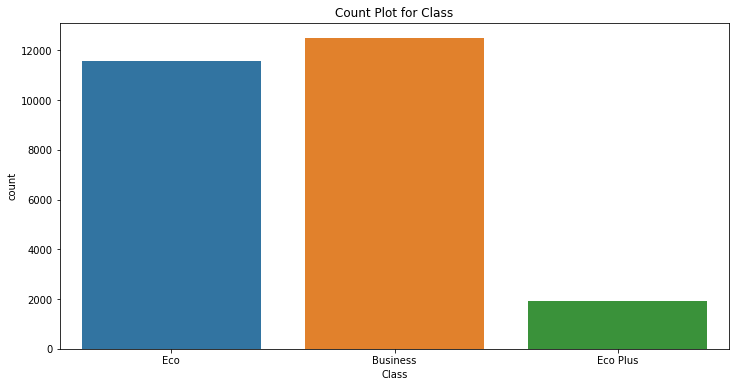

In [26]:
# Count plot for Class
plt.figure(figsize = (12,6))
sns.countplot(x='Class', data=df)
plt.title('Count Plot for Class')

From the count plot, we can observed that Eco class passengers than the Business class passengers and Eco Plus passengers.

Text(0.5, 1.0, 'Count Plot for satisfaction')

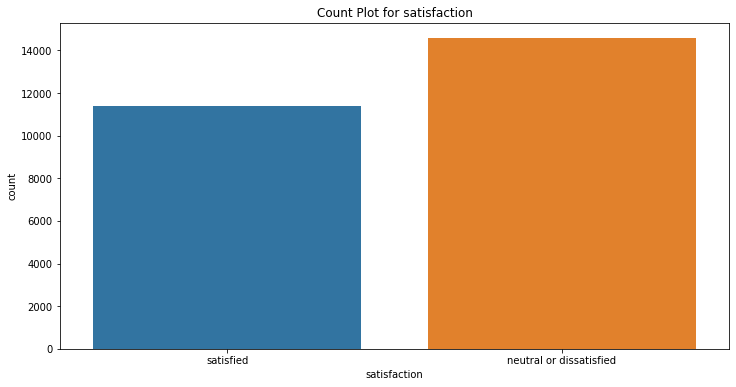

In [27]:
# Count plot for satisfaction
plt.figure(figsize = (12,6))
sns.countplot(x='satisfaction', data=df)
plt.title('Count Plot for satisfaction')

From the count plot, we can observed that neutral or dissatisfied passengers are more than satishfied customers.

## Bivariate Analysis

Text(0.5, 1.0, 'Stacked bar plot between satisfaction and Age variable')

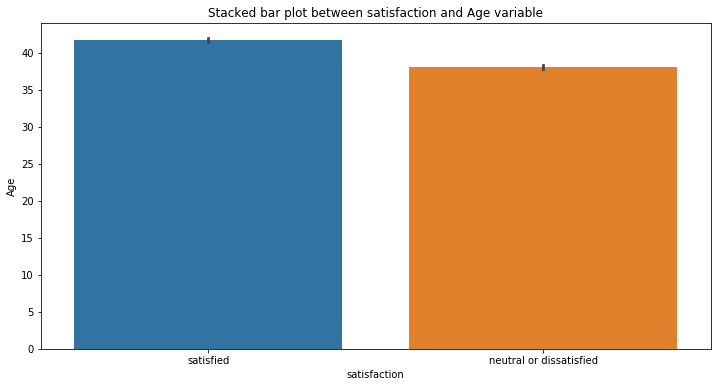

In [28]:
# Stacked Bar plot
plt.figure(figsize = (12,6))
sns.barplot(x='satisfaction',y='Age', data=df)
plt.title('Stacked bar plot between satisfaction and Age variable')

From the stacked bar chart, we can observed that the average age of satisfied passengers is around 42 and the average age of neutral or dissatisfied passengers is around 37.

Text(0.5, 1.0, 'Stacked bar plot between Gender and Age variable')

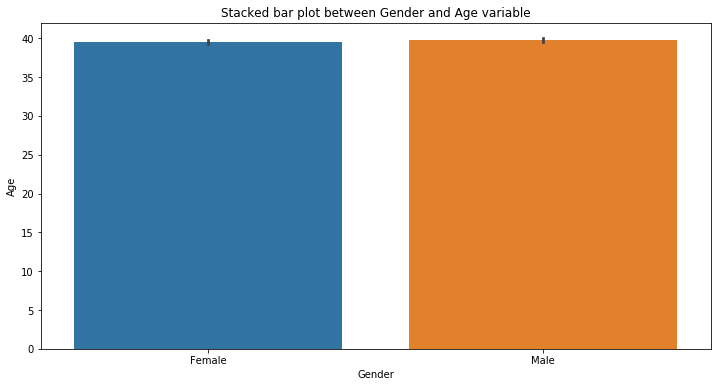

In [29]:
# Stacked Bar plot
plt.figure(figsize = (12,6))
sns.barplot(x='Gender',y='Age', data=df)
plt.title('Stacked bar plot between Gender and Age variable')

From the stacked bar chart, we can observed that the average age of both Female and Male passengers is around 39.

Text(0.5, 1.0, 'Stacked bar plot between customer type and Age variable')

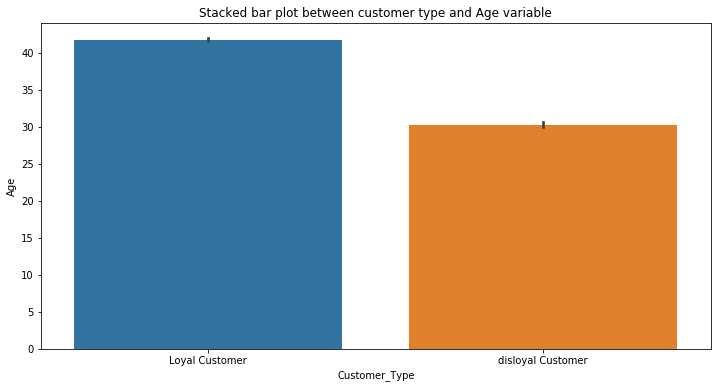

In [30]:
# Stacked Bar plot
plt.figure(figsize = (12,6))
sns.barplot(x='Customer_Type',y='Age', data=df)
plt.title('Stacked bar plot between customer type and Age variable')

From the stacked bar chart, we can observed that the average age of loyal customers is around 42 and the disloyal customers is around 29.

Text(0.5, 1.0, 'Stacked bar plot between Travel Type and Age variable')

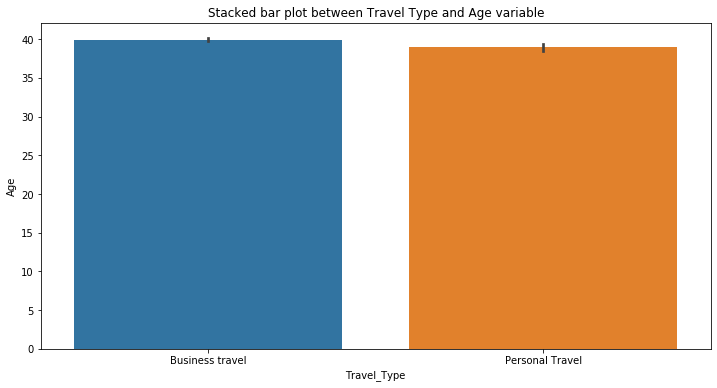

In [31]:
# Stacked Bar plot
plt.figure(figsize = (12,6))
sns.barplot(x='Travel_Type',y='Age', data=df)
plt.title('Stacked bar plot between Travel Type and Age variable')

From the stacked bar chart, we can observed that the average age of business travel passengers is around 39 and the personal travel passengers is around 38.

Text(0.5, 1.0, 'Stacked bar plot between Class and Age variable ')

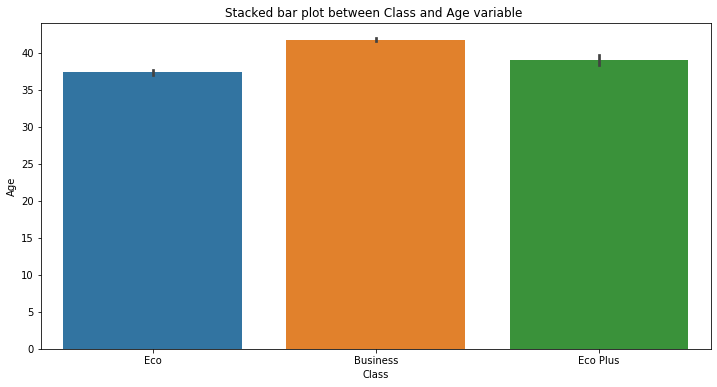

In [32]:
# Stacked Bar plot
plt.figure(figsize = (12,6))
sns.barplot(x='Class',y='Age', data=df)
plt.title('Stacked bar plot between Class and Age variable ')

From the stacked bar chart, we can observed that the average age of Eco class passengers is around 37, the average age of Business class passengers is around 43 and the average age of Eco Plus passengers is around 38.

# Encoding the Categorical variables

In [33]:
# Encoding Target variable
le = LabelEncoder()
le = le.fit_transform(df['satisfaction'])
df['satisfaction'] = pd.DataFrame(le,columns=['satisfaction'])
df['satisfaction']

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int32

In [34]:
# Encoding other variables 
df_encoded = pd.get_dummies(df,columns=['Gender','Customer_Type','Travel_Type','Class'])
df_encoded.head()

,id,Age,Flight_Distance,Wifi_Service,Departure_Arrival_Time,Online_Booking,Gate_Location,Food_Drink,Online_Boarding,Seat_Comfort,...,satisfaction,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Travel_Type_Business travel,Travel_Type_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,19556,52,160,5,4,3,4,3,4,3,...,1,1,0,1,0,1,0,0,1,0
1,90035,36,2863,1,1,3,1,5,4,5,...,1,1,0,1,0,1,0,1,0,0
2,12360,20,192,2,0,2,4,2,2,2,...,0,0,1,0,1,1,0,0,1,0
3,77959,44,3377,0,0,0,2,3,4,4,...,1,0,1,1,0,1,0,1,0,0
4,36875,49,1182,2,3,4,3,4,1,2,...,1,1,0,1,0,1,0,0,1,0


## Split dataset into train and test

In [35]:
X = df_encoded.drop('satisfaction',axis=1)
y  = df_encoded['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (20780, 28)
X_test shape: (5196, 28)
y_train shape: (20780,)
y_test shape: (5196,)


## Model building using Decision trees

### Decision Tree Classifer

In [36]:
%%time
## Decision tree clasifier
decision_cf = DecisionTreeClassifier(random_state=42)

decision_cf.fit(X_train,y_train)

Wall time: 132 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [37]:
## Model performance on test data
y_pred_dt = decision_cf.predict(X_test)
y_pred_dt

array([1, 0, 0, ..., 0, 0, 1])

In [38]:
# Satishfied or neutral or dissatishfied predictions for decision tree model
pred_df = pd.DataFrame(y_pred_dt, columns=['pred'])
# Here 1 is satishfied and 0 is neutral or dissatishfied passengers
pred_df['pred'].value_counts(normalize=True)

0    0.557929
1    0.442071
Name: pred, dtype: float64

In [39]:
## Model accuracy score
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy score for Decision Tree Classifer is {acc_dt}')

Accuracy score for Decision Tree Classifer is 0.9362971516551193


Confusion matrix is classification metric to evaluate model performance.

In [40]:
## Confusion Matrix
confusion_matrix(y_test, y_pred_dt)

array([[2743,  175],
       [ 156, 2122]], dtype=int64)

Let us plot confusion matrix

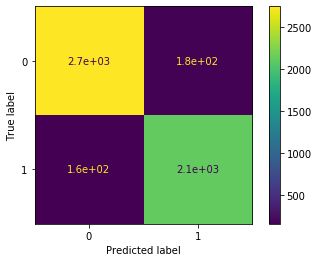

In [41]:
## plot confusion matrix
plot_confusion_matrix(decision_cf, X_test, y_test)

In [42]:
## Classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2918
           1       0.92      0.93      0.93      2278

    accuracy                           0.94      5196
   macro avg       0.94      0.94      0.94      5196
weighted avg       0.94      0.94      0.94      5196



Here, f1_score is 0.94 it means that the model performing well.

ROC curve is usually as a metric to evaluate model performance for unbalanced data.

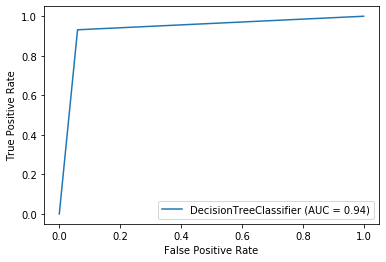

In [69]:
## Roc curve
plot_roc_curve(decision_cf, X_test, y_test)

Here, area under curve is 0.93 it means that the model performing well.

Feature: 0, Score: 0.02961
Feature: 1, Score: 0.01816
Feature: 2, Score: 0.01710
Feature: 3, Score: 0.18313
Feature: 4, Score: 0.00844
Feature: 5, Score: 0.00341
Feature: 6, Score: 0.00900
Feature: 7, Score: 0.00619
Feature: 8, Score: 0.35049
Feature: 9, Score: 0.01280
Feature: 10, Score: 0.04653
Feature: 11, Score: 0.00845
Feature: 12, Score: 0.01061
Feature: 13, Score: 0.01210
Feature: 14, Score: 0.02761
Feature: 15, Score: 0.01385
Feature: 16, Score: 0.01079
Feature: 17, Score: 0.00702
Feature: 18, Score: 0.00895
Feature: 19, Score: 0.00099
Feature: 20, Score: 0.00145
Feature: 21, Score: 0.03573
Feature: 22, Score: 0.00449
Feature: 23, Score: 0.00490
Feature: 24, Score: 0.14969
Feature: 25, Score: 0.01623
Feature: 26, Score: 0.00146
Feature: 27, Score: 0.00077


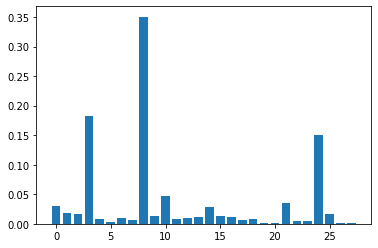

In [44]:
# To get importance features for decision tree model
importance = decision_cf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Logistic Regression Classifier

In [45]:
%%time
## Logistic regression Classifier
lr_cf = LogisticRegression(random_state=42)

# fitting the model
lr_cf.fit(X_train, y_train)

Wall time: 454 ms


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
## Model performance on test data
y_pred_lr = lr_cf.predict(X_test)
y_pred_lr

array([1, 0, 0, ..., 0, 1, 1])

In [47]:
# Satishfied or neutral or dissatishfied predictions for gradient boosting  model
pred_df = pd.DataFrame(y_pred_lr, columns=['pred'])
# Here 1 is satishfied and 0 is neutral or dissatishfied passengers
pred_df['pred'].value_counts(normalize=True)

0    0.507313
1    0.492687
Name: pred, dtype: float64

In [48]:
## Model accuracy score
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy score for Logistic Regression is {acc_lr}')

Accuracy score for Logistic Regression is 0.6893764434180139


Confusion matrix is classification metric to evaluate model performance.

In [49]:
## Confusion Matrix
confusion_matrix(y_test, y_pred_lr)

array([[1970,  948],
       [ 666, 1612]], dtype=int64)

Let us plot confusion matrix

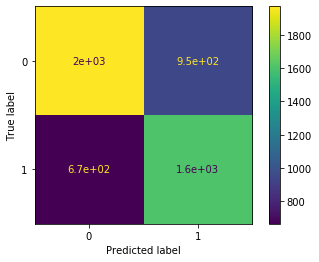

In [50]:
## plot confusion matrix
plot_confusion_matrix(lr_cf, X_test, y_test)

In [51]:
## Classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      2918
           1       0.63      0.71      0.67      2278

    accuracy                           0.69      5196
   macro avg       0.69      0.69      0.69      5196
weighted avg       0.70      0.69      0.69      5196



Here, f1_score is 0.62 it means that the model is not performing well.

ROC curve is usually as a metric to evaluate model performance for unbalanced data.

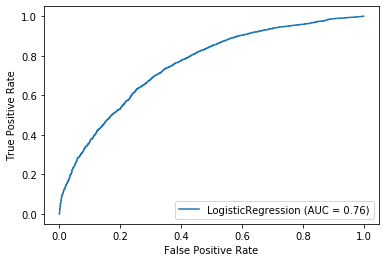

In [52]:
## Roc curve
plot_roc_curve(lr_cf, X_test, y_test)

Here, area under curve is 0.75 it means that the model not performing well.

Feature: 0, Score: -0.00001
Feature: 1, Score: -0.02829
Feature: 2, Score: 0.00037
Feature: 3, Score: 0.06041
Feature: 4, Score: -0.07953
Feature: 5, Score: 0.01278
Feature: 6, Score: -0.05870
Feature: 7, Score: 0.02342
Feature: 8, Score: 0.12587
Feature: 9, Score: 0.06347
Feature: 10, Score: 0.08625
Feature: 11, Score: 0.05438
Feature: 12, Score: 0.05229
Feature: 13, Score: 0.02075
Feature: 14, Score: 0.03018
Feature: 15, Score: 0.01632
Feature: 16, Score: 0.05632
Feature: 17, Score: 0.04425
Feature: 18, Score: -0.05116
Feature: 19, Score: -0.01036
Feature: 20, Score: -0.00699
Feature: 21, Score: 0.00191
Feature: 22, Score: -0.01926
Feature: 23, Score: 0.04150
Feature: 24, Score: -0.05885
Feature: 25, Score: 0.05122
Feature: 26, Score: -0.06121
Feature: 27, Score: -0.00735


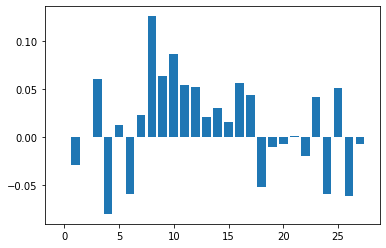

In [53]:
# To get importance features for logistic regression model
importance = lr_cf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random Foreset Classfier

In [54]:
%%time
## Random Forest Classifier
rf_cf = RandomForestClassifier(random_state=42)

# fitting the model
rf_cf.fit(X_train, y_train)

Wall time: 2.08 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [55]:
## Model performance on test data
y_pred_rf = rf_cf.predict(X_test)
y_pred_rf

array([1, 0, 0, ..., 0, 0, 1])

In [56]:
# Satishfied or neutral or dissatishfied predictions for Random forest model
pred_df = pd.DataFrame(y_pred_rf, columns=['pred'])
# Here 1 is satishfied and 0 is neutral or dissatishfied passengers
pred_df['pred'].value_counts(normalize=True)

0    0.571786
1    0.428214
Name: pred, dtype: float64

In [57]:
## Model accuracy score
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy score for Random  Forest Classifier is {acc_rf}')

Accuracy score for Random  Forest Classifier is 0.9609314857582756


Confusion matrix is classification metric to evaluate model performance.

In [58]:
## Confusion Matrix
confusion_matrix(y_test, y_pred_rf)

array([[2843,   75],
       [ 128, 2150]], dtype=int64)

Let us plot a random forest,

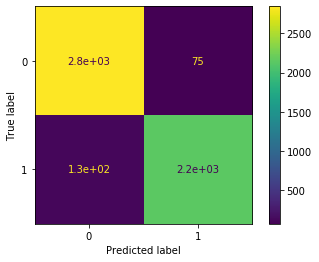

In [59]:
## plot confusion matrix
plot_confusion_matrix(rf_cf, X_test, y_test)

In [60]:
## Classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2918
           1       0.97      0.94      0.95      2278

    accuracy                           0.96      5196
   macro avg       0.96      0.96      0.96      5196
weighted avg       0.96      0.96      0.96      5196



Here, f1_score is 0.96 it means that the model is performing well.

ROC curve is usually as a metric to evaluate model performance for unbalanced data.

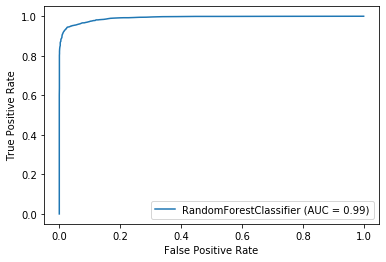

In [61]:
## Roc curve
plot_roc_curve(rf_cf, X_test, y_test)

Here, area under curve is 0.99 it means that the model performing well.

Feature: 0, Score: 0.02850
Feature: 1, Score: 0.02771
Feature: 2, Score: 0.03205
Feature: 3, Score: 0.13415
Feature: 4, Score: 0.01404
Feature: 5, Score: 0.03847
Feature: 6, Score: 0.01293
Feature: 7, Score: 0.01024
Feature: 8, Score: 0.14648
Feature: 9, Score: 0.04786
Feature: 10, Score: 0.04833
Feature: 11, Score: 0.02225
Feature: 12, Score: 0.02950
Feature: 13, Score: 0.02472
Feature: 14, Score: 0.02489
Feature: 15, Score: 0.02493
Feature: 16, Score: 0.02578
Feature: 17, Score: 0.00987
Feature: 18, Score: 0.01156
Feature: 19, Score: 0.00292
Feature: 20, Score: 0.00324
Feature: 21, Score: 0.02692
Feature: 22, Score: 0.02560
Feature: 23, Score: 0.05669
Feature: 24, Score: 0.06138
Feature: 25, Score: 0.07490
Feature: 26, Score: 0.03231
Feature: 27, Score: 0.00177


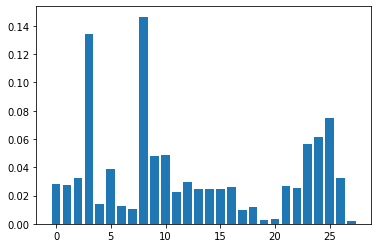

In [62]:
# To get importance features for Random Forest model
importance = rf_cf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Comparison of models

In [63]:
model = ['Decision_Tree', 'Logistic_Regression','Random_Forest']
results = pd.DataFrame(model, columns=['Model'])
acc = [0.93, 0.67, 0.95]
f1_score = [0.94, 0.68, 0.96]
auc = [0.93, 0.75, 0.99] # auc - Area under curve

results['Accuracy'] = pd.DataFrame(acc)
results['f1_score'] = pd.DataFrame(f1_score)
results['auc'] = pd.DataFrame(auc)
results

,Model,Accuracy,f1_score,auc
0,Decision_Tree,0.93,0.94,0.93
1,Logistic_Regression,0.67,0.68,0.75
2,Random_Forest,0.95,0.96,0.99
